In [14]:
import pandas as pd

df = pd.DataFrame({
    '과일' : ['수박', '참외', '포도', '수박']
})
df

pd.get_dummies(df) # 원핫인코딩

,과일_수박,과일_참외,과일_포도
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [8]:
fruits_dic = {}
box=[]
for i in df['과일']:
    if i not in fruits_dic:
        fruits_dic[i]= len(fruits_dic)
    box.append(fruits_dic[i])
fruits_dic

{'수박': 0, '참외': 1, '포도': 2}

In [9]:
box

[0, 1, 2, 0]

In [10]:
df['과일']= box
df #데이터를 숫자로 라벨링 하기

,과일
0,0
1,1
2,2
3,0


In [48]:
df = pd.read_csv('movies.csv')
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [50]:
del df['dir_prev_bfnum']

In [51]:
del df['title']

In [52]:
del df['release_time']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   time           600 non-null    int64 
 3   screening_rat  600 non-null    object
 4   director       600 non-null    object
 5   dir_prev_num   600 non-null    int64 
 6   num_staff      600 non-null    int64 
 7   num_actor      600 non-null    int64 
 8   box_off_num    600 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 42.3+ KB


In [54]:
df2=pd.get_dummies(df,drop_first=True)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 658 entries, time to director_황철민
dtypes: int64(5), uint8(653)
memory usage: 406.2 KB


In [58]:
data =df2.loc[:,df2.columns != 'box_off_num'].to_numpy()
target = df2['box_off_num'].to_numpy()

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_input, test_input , train_target, test_target = train_test_split(data,target)

rf = RandomForestRegressor()
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

0.3795667280583195

In [ ]:
rf.feature_importances_

In [47]:
df=pd.read_csv('FIFA.csv')
df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [73]:
#알고리즘

def square_sum():
    sum =0
    n=int(input())
    for i in range(1,n+1):
        sum=sum+ i*i
    return sum

square_sum()

2


5

In [90]:
def max_result(a):
    big=0
    for i in range(len(a)):
        if big<a[i]:
            big=a[i]
    return big

max_result([1,4,100,3])

100

In [98]:
def eqname(names):
    name=set()
    for i in range(len(names)):
        for j in range(i+1,len(names)):
            if names[i]==names[j]:
                name.add(names[i])
    return name


eqname(['수박','수박','참외','포도','사과'])

{'수박'}

In [102]:
def find_max(a):
    if len(a)==1:
        return a[0]
    value = find_max(a[:-1])
    if value>a[-1]:
        return value
    else:
        return a[-1]


find_max([1,2,3,4,5,6])

6

In [101]:
a=[1,2,3,4,5,6]
a[int(len(a)/2):]

[4, 5, 6]

In [104]:
def god(a,b):
    i = min(a,b)
    while True:
        if a%i==0 and b%i==0:
            return i
        i-=1

god(12,5)

1

In [113]:
def ucgod(a,b):
    if(b>a):
        tmp=a
        a=b
        b=tmp
    if(b==0):
        return a
    else:
        return ucgod(b,a%b)
ucgod(16,36)

4

In [114]:
def hanoi(n,start,end ,sub):
    if n==1:
        print('{}->{}'.format(start,end))
        return
    hanoi(n-1,start,sub,end)
    print('{}->{}'.format(start,end))
    hanoi(n-1,sub,end,start)
    

In [115]:
hanoi(2,1,3,2)

1->2
1->3
2->3


In [127]:
#selection sort
import random
def sel_sort(a):
    for i in range(len(a)):
        idx=i
        for j in range(i+1,len(a)):
            if a[j] < a[idx]:
                idx = j
        a[i],a[idx]=a[idx],a[i]
box = random.sample(range(1000),100)




sel_sort(box)
print(box)

[1, 5, 8, 38, 39, 42, 48, 58, 62, 64, 72, 76, 85, 86, 97, 142, 154, 164, 174, 187, 198, 227, 232, 238, 240, 273, 290, 294, 300, 301, 307, 310, 312, 320, 326, 338, 341, 345, 394, 399, 403, 407, 408, 417, 427, 430, 482, 486, 490, 499, 514, 522, 527, 533, 535, 543, 550, 552, 582, 585, 600, 608, 614, 635, 642, 643, 648, 649, 650, 681, 685, 688, 690, 695, 703, 705, 719, 723, 763, 764, 767, 783, 808, 821, 830, 842, 853, 865, 870, 875, 886, 892, 901, 915, 953, 964, 968, 971, 995, 999]


In [126]:
#quick
def quick_sort(a):
    if len(a)<=1:
        return a
    pivot = a[-1]
    box1=[]
    box2=[]

    for i in range(len(a)-1):
        if a[i] <pivot:
            box1.append(a[i])
        else:
            box2.append(a[i])

        return quick_sort(box1) + [pivot] + quick_sort(box2)


box=random.sample(range(100),20)
quick_sort(box)
box

[11, 32, 82, 54, 99, 88, 24, 17, 67, 76, 44, 73, 35, 14, 94, 56, 26, 5, 81, 98]

In [128]:
#이분 탐색 -> 정렬된 데이터일 경우

def binary_search(a,x):
    start = 0
    end = len(a) -1

    while start<=end:
        mid = (start + end)
        if x == a[mid]:
            return mid
        elif x>a[mid]:
            start = mid+1
        else:
            end = mid -1
    return -1

binary_search(box,198)

20

In [131]:
from collections import deque

box = deque()

box.append(5)
box.append(3)
box

deque([5, 3])

In [132]:
box.popleft()

5

In [141]:
def palindrome(s):
    box = []
    for i in s:
        if s.isalpha():
            box.append(i.lower())
    while box:
        if len(box)==1:
            return True
        a=box.pop(0)
        b=box.pop()
        if a!=b:
            return False
    
    return True
palindrome('ololo')

True

In [142]:
import numpy as np
import matplotlib.pyplot as plt

#비지도 학습
#2만장 사진 : 강아지, 고양이
#데이터 -> 전달 2가지 동물이 있다는 사실만 알려주고 알아서

fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

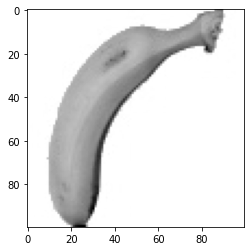

In [155]:
plt.imshow(fruits[210],'gray_r')

In [157]:
apple = fruits[:100].reshape(100,10000)
pineapple = fruits[100:200].reshape(100,10000)
banana=fruits[200:].reshape(100,10000)

apple.shape


(100, 10000)

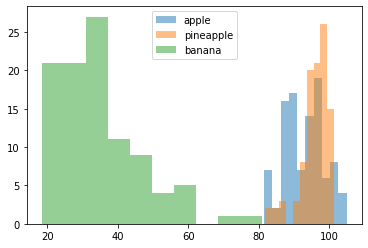

In [160]:
apple

plt.hist(np.mean(apple, axis=1),alpha=0.5)
plt.hist(np.mean(pineapple, axis=1),alpha=0.5)
plt.hist(np.mean(banana, axis=1),alpha=0.5)
plt.legend(['apple','pineapple','banana'])

<BarContainer object of 10000 artists>

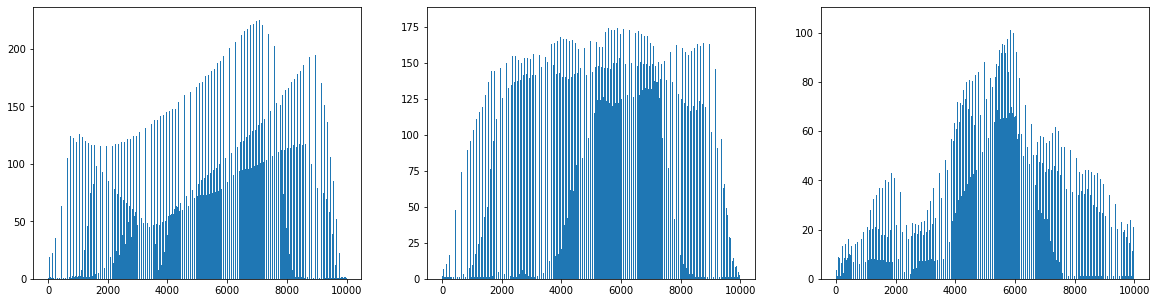

In [165]:
#도화지, 자리할당 1행3열, 가로20,세로5
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,3,figsize=(20,5))

axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))

In [168]:
from sklearn.cluster import KMeans

fruits = np.load('fruits_300.npy')
fruits2 = fruits.reshape(-1,10000)
fruits2.shape

(300, 10000)

In [169]:
km = KMeans(n_clusters=3)
km.fit(fruits2)

KMeans(n_clusters=3)

In [170]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [171]:
#몇 종류의 과일이 있는지 모를때?
box = []
for i in range(2,7):
    km = KMeans(n_clusters=i)
    km.fit(fruits2)
    #제곱합 : 이너셔
    box.append(km.inertia_)
box

[5856532545.983113,
 5074977316.088373,
 4650031013.934265,
 4362998312.55119,
 3997030130.9539833]

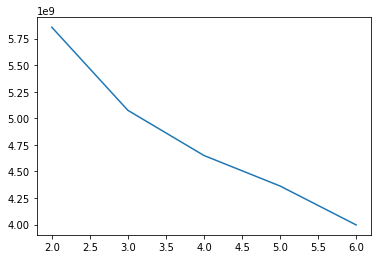

In [174]:
plt.plot(range(2,7),box)